Data loaded successfully!
Shape: (4521, 17)
Columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  n

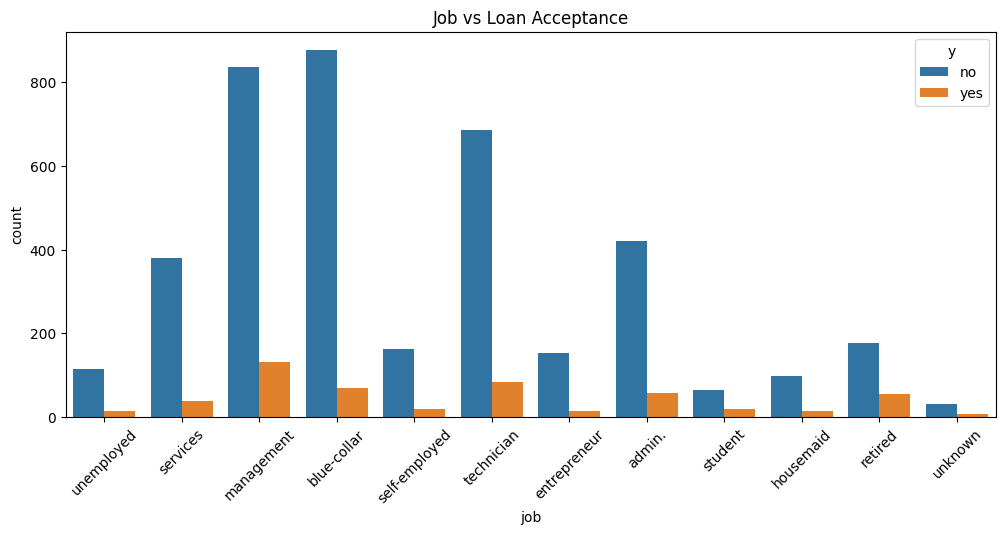

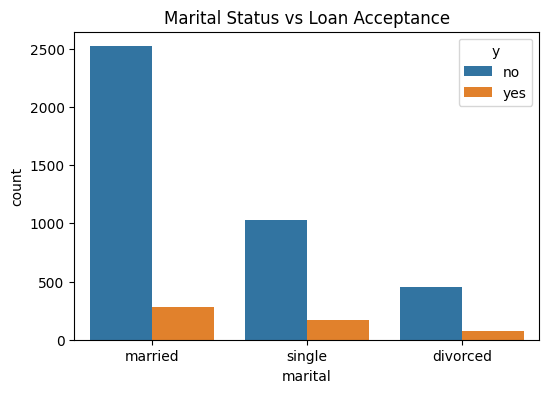

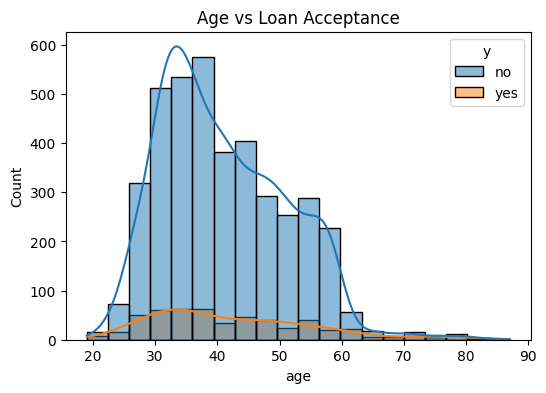


🔹 Logistic Regression
Accuracy: 0.887988209285188
Confusion Matrix:
 [[1176   29]
 [ 123   29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.50      0.19      0.28       152

    accuracy                           0.89      1357
   macro avg       0.70      0.58      0.61      1357
weighted avg       0.86      0.89      0.87      1357


🔹 Decision Tree Classifier
Accuracy: 0.8577745025792188
Confusion Matrix:
 [[1109   96]
 [  97   55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.36      0.36      0.36       152

    accuracy                           0.86      1357
   macro avg       0.64      0.64      0.64      1357
weighted avg       0.86      0.86      0.86      1357



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Task 5: Personal Loan Acceptance Prediction

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load Dataset with Correct Delimiter
df = pd.read_csv('bank.csv', delimiter=';')
print("Data loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

# Step 3: Data Exploration
print("\nBasic Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nTarget class distribution:\n", df['y'].value_counts())

# Step 4: Visualizations
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='job', hue='y')
plt.title('Job vs Loan Acceptance')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='marital', hue='y')
plt.title('Marital Status vs Loan Acceptance')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', hue='y', bins=20, kde=True)
plt.title('Age vs Loan Acceptance')
plt.show()

# Step 5: Encode Categorical Columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Step 6: Feature and Target Separation
X = df.drop('y', axis=1)
y = df['y']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Train Models
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

# Step 9: Evaluate Models
print("\n🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))

print("\n🔹 Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, tree_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("Classification Report:\n", classification_report(y_test, tree_preds))
